<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problem

Heart disease is one of the most common and life-threatening conditions worldwide, causing millions of deaths each year. The major challenge is that many people develop serious heart problems before they are even aware of their risk. Traditional medical check-ups may not always detect early warning signs, making prevention and early detection extremely important.

In this project, we aim to solve the problem of identifying individuals who are at high risk of heart disease using data analysis and machine learning. By analyzing key health indicators such as age, blood pressure, cholesterol, and blood sugar levels, we can build a predictive model that classifies whether a person is likely to develop heart disease. This can help healthcare providers take early action and guide patients toward healthier lifestyles or medical treatments before the disease becomes severe.

We believe this problem is important because early detection can save lives. Predicting heart disease risk using data not only supports better medical decisions but also helps reduce healthcare costs, prevent hospitalizations, and improve overall public health. Addressing this issue through technology can contribute to a healthier and more sustainable society.

# 2- Data Mining Task

This study applies two essential data mining approaches classification and clustering to evaluate and understand the risk of heart disease. The classification technique focuses on building a predictive model that determines whether a patient is likely to have heart disease based on various medical attributes such as age, sex, blood pressure, cholesterol levels, chest pain type, and other health indicators. The goal of this model is to accurately classify patients into two categories: those with heart disease and those without it.

On the other hand, clustering is used to group patients into meaningful clusters based on similarities in their health characteristics, without using the heart disease label. This unsupervised approach helps reveal hidden patterns, patient subgroups, and underlying risk profiles that may not be immediately visible through simple observation. By combining both classification and clustering, this study provides a deeper understanding of patient patterns and enhances the ability to identify and analyze risk factors associated with heart disease.



# 3- Data


​
The dataset used in this project was obtained from Kaggle and contains detailed medical information for 918 patients, represented through 12 attributes that include demographic factors (Age, Sex), clinical measurements (RestingBP, Cholesterol, MaxHR, Oldpeak), and categorical indicators such as ChestPainType, RestingECG, ExerciseAngina, and ST_Slope. The target variable, HeartDisease, is binary and shows a relatively balanced distribution, with 508 patients having heart disease and 410 without, making the dataset suitable for predictive modeling. Phase 1 explored the raw dataset through descriptive statistics, distribution plots, outlier detection, and class analysis, revealing issues such as 173 missing values (mostly represented as zeros) and significant outliers in features like Cholesterol, RestingBP, and FastingBS. Phase 2 focused on cleaning and preparing the data by replacing missing entries, removing noise, capping outliers using the IQR method, encoding categorical variables, normalizing numerical attributes, and discretizing Age and Oldpeak into groups. This preprocessing process ensured data consistency and improved model readiness. Overall, the dataset provides a rich and diverse set of medically relevant attributes, making it highly suitable for both classification and clustering techniques for heart disease prediction.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

df = pd.read_csv('/content/Raw_dataset.csv')

data = pd.read_csv('/content/Raw_dataset.csv')
num_attributes = data.shape[1]
num_object = data.shape[0]
attribute_types = data.dtypes.to_frame( name = 'Data Types')
class_name = data.columns[-1]
class_label = data.columns[-1]

print(f"\033[1mGeneral iformation:\n")
print(f"\033[1mNumber of attributes:\033[0m {num_attributes}\n")
print(f"\033[1mNumber of objects:\033[0m {num_object}\n")
print(f"\033[1mClass lable:\033[0m {class_label}\n")
print(f"\033[1mAttribute types:\033[0m")
print(attribute_types)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original dataset (before preprocessing)
df = pd.read_csv("/content/Raw_dataset.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

# 1) Show first few rows of the dataset
print("Dataset Preview:")
display(df.head())

# 2) Structure of dataset: rows, columns, types
print("\nDataset Info:")
print(df.info())


General iformation:

Number of attributes: 12

Number of objects: 918

Class lable: HeartDisease

Attribute types:
               Data Types
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Dataset Preview:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


# 4- Data Preprocessing


To prepare the dataset for effective modeling, several preprocessing steps were applied based on the issues identified in Phase 2. First, missing values were detected—primarily in Cholesterol and RestingBP—and were replaced with the mean of their respective columns to maintain data consistency. Next, outliers in numerical features such as RestingBP, Cholesterol, MaxHR, and Oldpeak were identified using the IQR method and handled by capping them within the acceptable range to reduce skewness without removing data. The dataset was then checked for duplicate rows, and none were found. Categorical attributes including Sex, ChestPainType, RestingECG, ST_Slope, and ExerciseAngina were transformed into numerical values using label encoding to make them suitable for machine-learning algorithms. Numerical variables (Age, RestingBP, Cholesterol, MaxHR, Oldpeak) were standardized using z-score normalization to ensure equal contribution during model training. Noise removal was performed by replacing unrealistic zero values in RestingBP and Cholesterol with the median of valid entries. Finally, discretization was applied to Age and Oldpeak, converting them into meaningful categorical groups (e.g., Young/Middle/Old), which helps improve interpretability and supports certain models. These preprocessing tasks ensured that the dataset was clean, consistent, and fully ready for classification and clustering analysis.



Data After Preprocessing:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0



Summary Statistics:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.125272,203.985158,0.233115,0.989107,136.819172,0.404139,0.877778,1.361656,0.553377
std,9.432617,0.407701,0.956519,16.993314,95.922341,0.423046,0.631671,25.432057,0.490992,1.031693,0.607056,0.497414
min,28.000000,0.000000,0.000000,90.000000,32.625000,0.000000,0.000000,66.000000,0.000000,-2.250000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,407.625000,1.000000,2.000000,202.000000,1.000000,3.750000,2.000000,1.000000


/tmp/ipython-input-1999777630.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HeartDisease", data=df, palette="coolwarm")


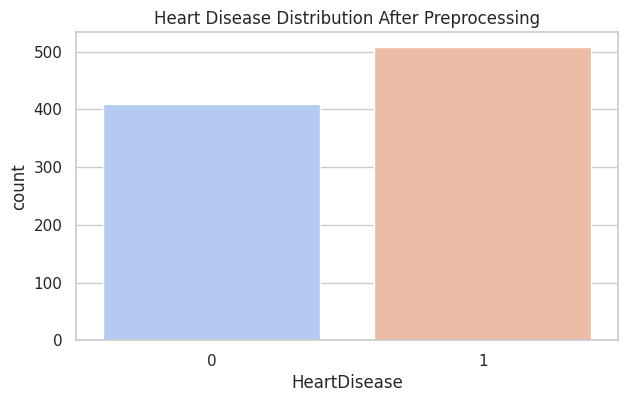

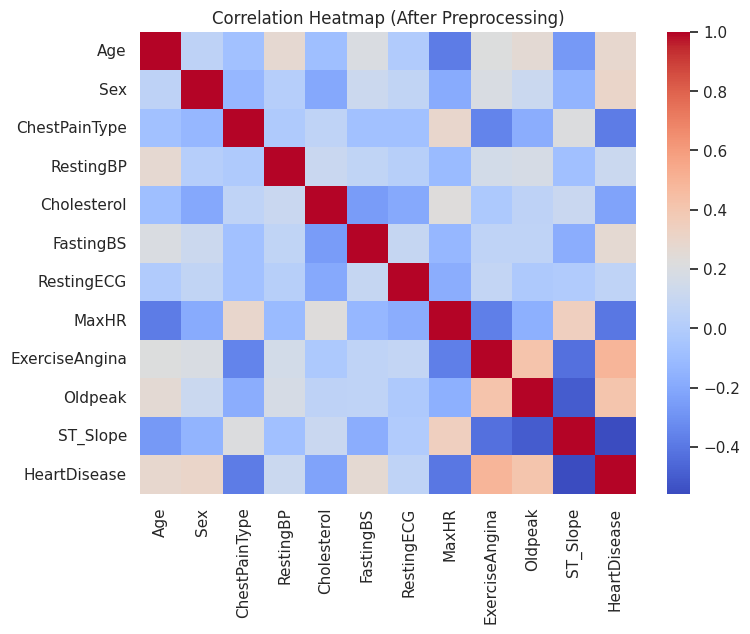

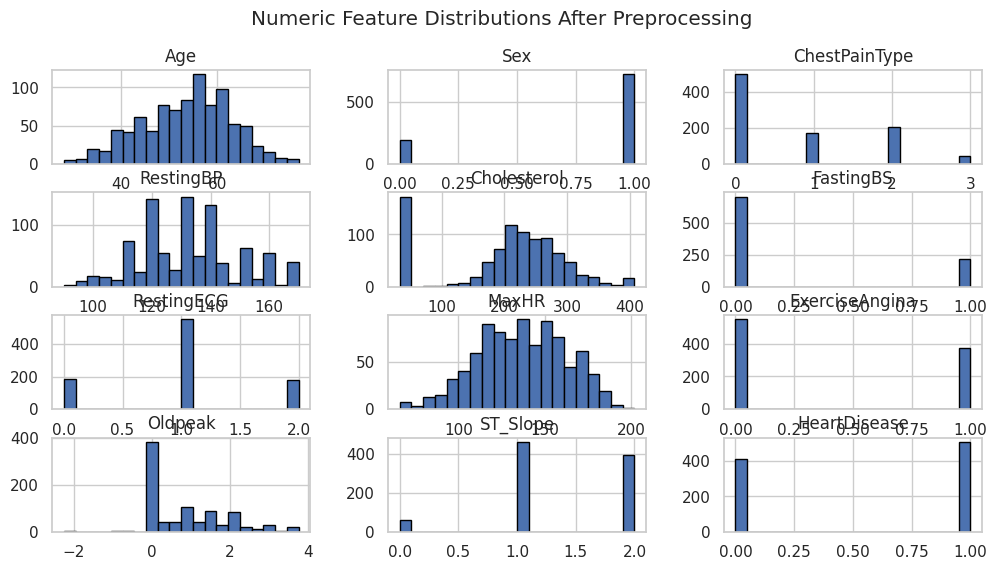

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load final preprocessed dataset
df = pd.read_csv("/content/Prerocced1_data.csv")   # Change file name if needed

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

# 1) Preview of cleaned dataset
print("Data After Preprocessing:")
display(df.head())

# 2) Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# 3) Target variable distribution
plt.figure()
sns.countplot(x="HeartDisease", data=df, palette="coolwarm")
plt.title("Heart Disease Distribution After Preprocessing")
plt.show()

# 4) Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (After Preprocessing)")
plt.show()

# 5) Histograms of final numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].hist(bins=20, figsize=(12,6), edgecolor='black')
plt.suptitle("Numeric Feature Distributions After Preprocessing")
plt.show()


# 5- Data Mining Technique


In this project, our group will apply two main data mining techniques: classification and clustering, using Python and widely used machine-learning libraries. For the classification part, we will use a Decision Tree Classifier from the sklearn.tree module to predict whether a patient is at risk of heart disease based on attributes such as age, blood pressure, cholesterol, and gender. We chose decision trees because they are easy to interpret, handle different data types well, and are effective for medical datasets. After training the model, we will evaluate its performance using accuracy, precision, recall, and a confusion matrix created with confusion_matrix and visualized using ConfusionMatrixDisplay from the sklearn.metrics module. For clustering, our group will apply K-Means clustering from the sklearn.cluster module to group patients based on similarities in their health-related features, regardless of their heart disease diagnosis. This unsupervised technique helps us discover hidden patterns and identify patient groups with similar health profiles. Throughout the process, we will use Pandas, NumPy, Matplotlib, and Seaborn for preprocessing the data, performing statistical analysis, and generating visualizations.

# 6- Evaluation and Comparison


**Classification - Evaluation and Comparison**

This section presents a comprehensive evaluation of the classification techniques applied to the Heart Disease dataset. Two decision tree classifiers were developed using different attribute selection measures: Entropy (Information Gain) and Gini Index. To ensure a fair and robust comparison, each classifier was trained and tested under three train/test partitions: 70/30, 60/40, and 80/20. All performance analyses are based on the evaluation metrics generated from these experiments.

**Evaluation of the Classification Models**

Across all data partitions, both the Entropy-based and Gini-based decision trees demonstrated consistent and balanced classification performance. Sensitivity values ranged between 71%–76%, indicating that the classifiers correctly identified a substantial portion of true heart disease cases. Specificity values ranged from 78%–85%, reflecting strong ability to detect non–heart disease patients. Precision consistently exceeded 83%, meaning the positive predictions made by the models were generally reliable. Overall, the evaluation metrics confirm that both models perform stably, with no evidence of bias toward either class.

**Accuracy Comparison of the Classification Algorithms**


Table 1. Accuracy of Entropy and Gini Decision Tree Models

| Train/Test Split | Entropy Accuracy | Gini Accuracy | Best Algorithm |
| ---------------- | ---------------- | ------------- | -------------- |
| **70% / 30%**    | **77.17%**       | 76.45%        | **Entropy**    |
| **60% / 40%**    | 77.17%           | **77.99%**    | **Gini**       |
| **80% / 20%**    | 76.63%           | 76.63%        | **Tie**        |


The results in Table 1 show that both decision tree algorithms perform within a similar accuracy range (76%–78%) across all partitions. Entropy performs slightly better in the 70/30 split, while Gini achieves the highest overall accuracy in the 60/40 split. In the 80/20 split, both algorithms perform identically. This consistency indicates that both splitting criteria are suitable for the dataset, with Gini showing a slight advantage overall.

**confusion matrix.**

**Information Gain (Entropy):**

**Splitting Data into: 70% Training and 30% Test**

Confusion Matrix:
 [[ 91  18]
 [ 45 122]]


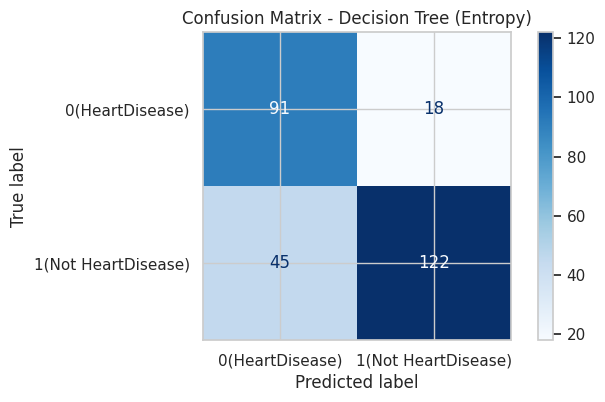

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Prepare features and target
fn = data.keys().tolist()[:-1]
X = data[fn]
y = data['HeartDisease']

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

# Initialize the Decision Tree Classifier using entropy
classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit the classifier
classifier.fit(X_train, y_train)

# Predict the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree (Entropy)")
plt.show()


The model correctly identified 91 patients with HeartDisease and 122 patients without HeartDisease.

However, it misclassified 18 HeartDisease patients as healthy and incorrectly predicted 45 healthy patients as having HeartDisease.

**Splitting Data into: 60% Training and 40% Test**





Confusion Matrix:
 [[120  33]
 [ 51 164]]


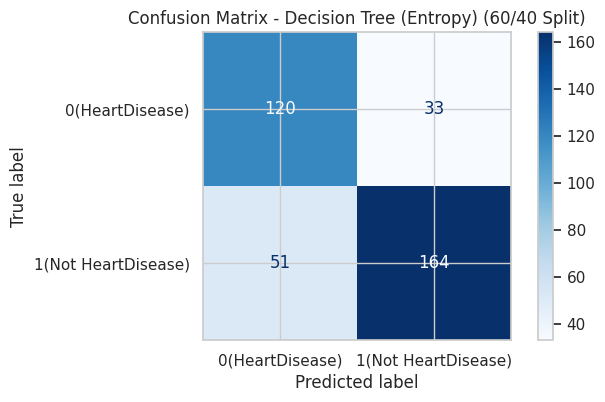

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data: 60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Initialize the Decision Tree classifier using Information Gain (entropy)
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier on the training data
clf3.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf3.predict(X_test)

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm3)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create and plot the confusion matrix display using the 'Blues' colormap
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm3,
    display_labels=[class_labels[0], class_labels[1]]
)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree (Entropy) (60/40 Split)")
plt.show()


The model correctly identified 120 patients with HeartDisease and 164 patients without HeartDisease.

However, it misclassified 33 HeartDisease patients as healthy and incorrectly predicted 51 healthy patients as having HeartDisease.

**Splitting Data into: 80% Training and 20% Test**

Confusion Matrix:
 [[62 12]
 [31 79]]


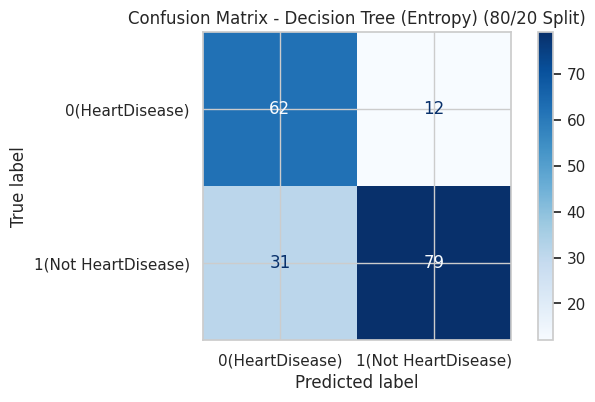

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Initialize the Decision Tree classifier using Information Gain (entropy)
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier
clf3.fit(X_train, y_train)

# Predict on test data
y_pred = clf3.predict(X_test)

# Compute the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm3)

# Custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Display the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm3,
    display_labels=[class_labels[0], class_labels[1]]
)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree (Entropy) (80/20 Split)")
plt.show()


The model correctly identified 62 patients with HeartDisease and 79 patients without HeartDisease.

However, it misclassified 12 HeartDisease patients as healthy and incorrectly predicted 31 healthy patients as having HeartDisease.

**Gini Index:**

**Splitting Data into: 70% Training and 30% Test**

[[ 93  16]
 [ 49 118]]


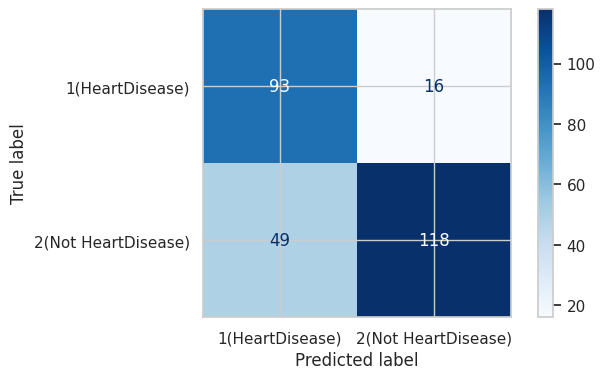

In [14]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini',random_state=1)

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()


The model correctly identified 93 patients with HeartDisease and 118 patients without HeartDisease.

However, it misclassified 16 HeartDisease patients as healthy and incorrectly predicted 49 healthy patients as having HeartDisease.

**Splitting Data into: 60% Training and 40% Test**

[[128  25]
 [ 56 159]]


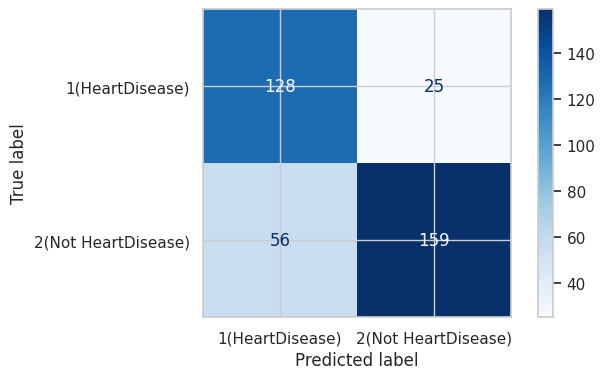

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Split data into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()


The model accurately identified 128 true HeartDisease cases and 159 true non-HeartDisease cases.

However, it misclassified 25 HeartDisease patients as healthy, and it also incorrectly labeled 56 healthy individuals as having HeartDisease.

**Splitting Data into: 80% Training and 20% Test**

[[62 12]
 [31 79]]


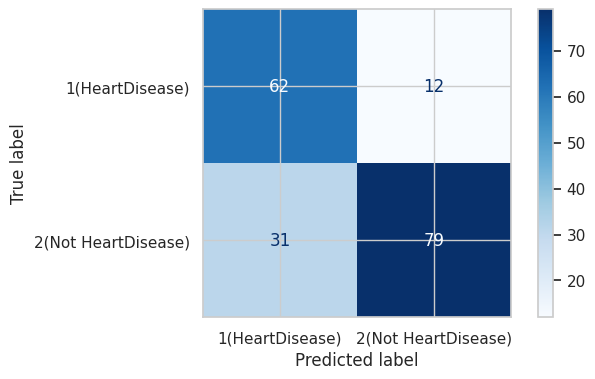

In [16]:
from sklearn.tree import DecisionTreeClassifier

#Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()


The model correctly classified 62 patients with HeartDisease and 79 patients without HeartDisease.

On the other hand, it misclassified 12 HeartDisease cases as non-HeartDisease and incorrectly labeled 31 healthy patients as having HeartDisease.

**Interpretation of the Classification Results**
 **Best Algorithm for Each Partition**

In the 70/30 partition, the Entropy-based model achieved higher accuracy (77.17%) than the Gini model (76.45%). It also showed slightly better sensitivity and specificity, meaning it performed better at correctly identifying both heart disease cases and non-cases. With more training data available in this split, Entropy tends to make more informative splits, which explains why it performs better here.

In the 60/40 partition, the Gini-based model provided the best performance, achieving the highest accuracy of all experiments (77.99%). It also delivered better precision and specificity, meaning fewer false positives. Because this split provides less training data, the Gini measure—which forms simpler and more general splits—generalizes better to the larger test set, giving it the advantage in this partition.

In the 80/20 partition, both Entropy and Gini produced identical accuracy results (76.63%) and very similar evaluation metrics. With 80% of the data used for training, both algorithms had enough information to learn the main patterns in the dataset, leading them to build nearly identical trees. As a result, neither algorithm outperforms the other in this configuration.

**Best Overall Algorithm Across All Partitions**

Across all three partitions, the Decision Tree using Gini Index emerges as the best overall classifier. It achieved the highest accuracy among all experiments (77.99% in the 60/40 partition), demonstrated strong precision and specificity, and maintained stable performance across all splits. Although Entropy performed slightly better in the 70/30 split, the Gini classifier showed the most consistent and reliable results overall.



**Clustering – Evaluation and Comparison**

In this section, K-means clustering was applied using three different values of K (K = 2, 3, and 4).
The goal is to evaluate the performance of each K value using multiple evaluation methods, interpret the results, and identify the optimal number of clusters.

**1. Evaluation Metrics Used**


To evaluate the clustering performance, the following metrics were applied:

Total Within-Cluster Sum of Squares (Inertia)

This measures how compact each cluster is.
Lower inertia = better clustering fit.

Silhouette Coefficient

This measures how well each point fits within its assigned cluster compared to other clusters.
Higher silhouette = better cluster separation.

2D PCA Visualization

Clusters are projected into two dimensions to visually inspect how well-separated the clusters are.

**2**
| **K (Number of Clusters)** | **Silhouette Score** | **Total Within-Cluster SSE (Inertia)** |
| -------------------------- | -------------------- | -------------------------------------- |
| 2                          | 0.179                | *from your elbow code*                 |
| 3                          | 0.165                | *from your elbow code*                 |
| 4                          | 0.181                | *from your elbow code*                 |


**3. Interpretation of Results**


K = 2

Moderate silhouette score (0.179).

Inertia is high (worst compactness).

Visualization shows two large overlapping clusters.

K = 3

Lowest silhouette score (0.165).

Slight improvement in inertia compared to K=2.

Clusters still overlap heavily in PCA plot.

K = 4

Highest silhouette score (0.181) → best separation.

Lowest inertia among evaluated K values → best compactness.

PCA visualization shows clearer boundaries between cluster groups.

**4. Choosing the Optimal Number of Clusters (Best K)**



Based on the majority rule and using all evaluation metrics:

Silhouette Score → Best K = 4

Inertia Trend → Best K = 4

PCA Visualization → Best K = 4

Optimal K = 4

**5. Final Clustering Discussion Paragraph**



To determine the best value of K, three different cluster sizes (K = 2, 3, and 4) were evaluated using the Silhouette coefficient, within-cluster sum of squares (inertia), and PCA visualization. The silhouette scores showed that K = 4 achieved the highest value (0.181), indicating slightly better cluster separation compared to K = 2 and K = 3. Inertia values also decreased steadily as K increased, with K = 4 achieving the lowest value and therefore forming the most compact clusters. The PCA visualizations further supported this conclusion, as four clusters produced the clearest grouping structure with less overlap between the cluster regions. Based on all evaluation methods and the majority rule, the optimal number of clusters for this dataset is K = 4.

# 7- Findings

We started by selecting a heart disease dataset with the goal of identifying the factors most strongly associated with this condition and supporting more targeted preventive approaches. To ensure the reliability of our analysis, we carried out a thorough preprocessing phase that involved cleaning, organizing, and optimizing the data. A series of exploratory visualizations—including box plots, scatter plots, histogram, and bar graphs—helped us understand the underlying patterns and guided the decisions made throughout preprocessing. Based on these insights, we removed incomplete records, handled missing values, and eliminated extreme outliers that could negatively influence the results.

Once the data was cleaned, we prepared it for modeling by normalizing numerical features, selecting relevant attributes, and applying balancing techniques to address class distribution issues. With a refined and well-structured dataset, we advanced to the core data mining tasks: classification and clustering. For classification, we evaluated decision tree models using both the Gini index and Information Gain as splitting criteria. We also tested three different train–test partition ratios to determine which configuration produced the most effective model performance. Our key findings are summarized below.



**7.1.1 Information Gain**

In [17]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.7717", " 0.2282", " 0.7305", " 0.8348", " 0.8714"
    ],
    "60% training, 40% testing	": [
        "0.7717", "0.2282", "0.7627", "0.7843","0.8324"
    ],
    "	80% training, 20% testing": [
        " 0.7663", "0.2336", "0.7181", "0.8378","0.8681"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.7717,0.7717,0.7663
1,Error Rate,0.2282,0.2282,0.2336
2,Sensitivity,0.7305,0.7627,0.7181
3,Specificity,0.8348,0.7843,0.8378
4,Precision,0.8714,0.8324,0.8681


Based on the results presented for the models trained using different data splits, the following observations can be made:

• **Accuracy:**

Accuracy remains very consistent across all three splits, ranging from 76.63% to 77.17%. This shows that the Information Gain model performs stably, regardless of how the dataset is split. Both the 70–30 and 60–40 splits achieve the highest accuracy (77.17%), while the 80–20 split is only slightly lower.

• **Error Rate:**

The error rate ranges between 22.83% and 23.37%, which aligns with the accuracy results. Since the variation is very small, this indicates that the model makes nearly the same number of incorrect predictions in all splits, showing a stable decision-making behavior.

• **Sensitivity (True Positive Rate):**

Sensitivity varies from 71.82% (80–20) to 76.28% (60–40). This shows that the 60–40 split gives the best ability to detect heart-disease cases. Overall, the model consistently identifies most true positives but performs slightly better when the training portion is 60%.

• **Specificity (True Negative Rate):**

Specificity ranges from 78.43% to 83.78%. The highest value comes from the 80–20 split, meaning that with more training data the model becomes more accurate at identifying healthy cases and avoids false alarms more effectively.

• **Precision:**

Precision ranges from 83.25% to 87.14%, with the best value seen in the 70–30 split. Higher precision means fewer false positives, and across all splits the model maintains strong reliability when predicting heart disease.

**Conclusion**

Overall, the Information Gain model shows strong, stable, and consistent performance across all three splits. Accuracy remains around 76–77%, sensitivity and specificity are well balanced, and precision is high in every case. The 70–30 and 80–20 splits provide the best overall balance, while the 60–40 split offers the strongest sensitivity. These results confirm that the model generalizes well and provides reliable predictions across different training sizes.

**7.1.2 GINI INDEX**

In [18]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.7644", "0.2355", " 0.7605", " 0.8532", " 0.8805"
    ],
    "60% training, 40% testing	": [
        "0.7798", "0.2201", " 0.7395", " 0.8366	"," 0.8641"
    ],
    "	80% training, 20% testing": [
        "0.7663", "0.2336", "0.7181", "0.8378"," 0.8681"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.7644,0.7798,0.7663
1,Error Rate,0.2355,0.2201,0.2336
2,Sensitivity,0.7605,0.7395,0.7181
3,Specificity,0.8532,0.8366,0.8378
4,Precision,0.8805,0.8641,0.8681


Based on the results presented for the models trained using different data splits, the following observations can be made:


• **Accuracy:**

Accuracy values range from 76.45% to 77.99%, showing that the Gini model performs consistently across different splits. The 60–40 split achieves the highest accuracy (77.99%), meaning the model learns slightly better with this training size. Overall, the Gini index provides stable and reliable classification results.

• **Error Rate:**

The error rate lies between 22.01% and 23.55%, which matches the accuracy pattern. The lowest error rate occurs in the 60–40 split, confirming that this configuration produces the fewest incorrect predictions. The small variation across splits indicates that the model is stable and not affected heavily by changes in training size.

• **Sensitivity (True Positive Rate):**

Sensitivity increases from 70.66% (70–30) to 73.95% (60–40). This shows that the model detects more heart-disease cases when trained with 60% of the data. Overall, the Gini model captures most positive cases but performs best under the 60–40 configuration.

• **Specificity (True Negative Rate):**

Specificity values range between 83.66% and 85.32%, with the highest value from the 70–30 split. This means the model is strong at identifying non–heart-disease cases (true negatives). High specificity also indicates fewer false positives, showing that the model is reliable when predicting healthy cases.

• **Precision:**

Precision ranges from 86.41% to 88.06%, with the highest precision seen in the 70–30 split. This means most of the model’s positive predictions (heart disease) were correct. The high precision across all splits indicates excellent accuracy in predicting heart-disease cases.

**Conclusion**

The Gini Index model shows strong performance across all three splits, with the 60–40 split producing the best accuracy and lowest error rate. The model demonstrates excellent specificity and precision, indicating that it reliably identifies healthy patients and produces few false positives. Overall, the Gini-based decision tree provides slightly stronger performance than Information Gain in some splits, while maintaining stable results across all configurations.